In [362]:
import pandas as pd
from sklearn import svm
import numpy as np
from time import time
import matplotlib.pyplot as plt
import matplotlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alyokhina-o/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [363]:
def get_data_smsspam():
    data = pd.read_csv("datasets/smsspam.csv").values
    return data[:, 1], data[:, 0]

def split_data(points, labels):
    points_train, points_test, labels_train, labels_test = train_test_split(points, labels, train_size=0.8)  
    return points_train, labels_train, points_test,  labels_test

In [364]:
def roc(labels, scores, l):
    x, y, _ = metrics.roc_curve(labels, scores, pos_label=l)
    plt.plot(x, y)
    plt.show()

In [367]:
def naive_bayesian_classifier_with_discrete_features(points_train, labels_train, points_test,  labels_test):
    unique_labels, counts = np.unique(labels_train, return_counts=True)
    cp = counts / len(labels_train)
    unique_words = np.unique(np.array([word for value in points_train for word in [PorterStemmer().stem(word) for word in word_tokenize(value)]])) 
    word_dict = {unique_words[i]: i for i in range(len(unique_words))}
    fr = []
    for label in unique_labels:
        xs = np.array([word for value in points_train[labels_train == label] for word in [PorterStemmer().stem(word) for word in word_tokenize(value)]])
        fr.append(np.array([np.sum(xs == word) for word in unique_words]))
    points_test = np.array([[PorterStemmer().stem(word) for word in word_tokenize(row)] for row in points_test])
    sc = np.empty((len(points_test), len(unique_labels)))
    fr = np.array(fr)
    for label in range(len(unique_labels)):
        c = np.sum(fr[label]) + len(word_dict)
        for i in range(len(points_test)):
            p = 1
            for j in range(len(points_test[i])):
                 if  points_test[i][j] in word_dict:
                    p *= (fr[label][word_dict[points_test[i][j]]] + 1)/c    
            sc[i][label] = cp[label] * p  
    for i in range(len(sc)):
        s = np.sum(sc[i])
        if (s == 0):
            sc[i] = 0.5
        else :
            sc[i] = sc[i]/s
    print(np.mean(labels_test == unique_labels[np.argmax(sc, axis=1)]))
    return sc

0.979372197309417


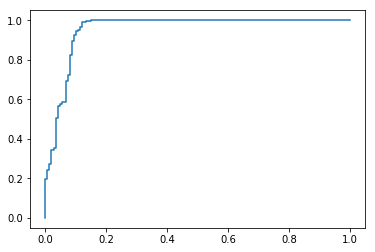

In [368]:
points, labels = get_data_smsspam()
points_train, labels_train, points_test,  labels_test = split_data(points, labels)
scores = naive_bayesian_classifier_with_discrete_features(points_train, labels_train, points_test,  labels_test)
roc(labels_test, scores[:, 0], 'ham')